In [ ]:
import os
import cv2
import glob
import scipy
import random
import skimage
import argparse
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.transform import resize

import tensorflow
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, save_img, img_to_array
#from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax,Adadelta,Adagrad
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation, GlobalAveragePooling2D
from tensorflow.keras.layers import AveragePooling2D, Input, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score


for dirname, _, filenames in os.walk('F:\Personal\ALL\Data 7 Class'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [ ]:
def Images_details_Print_data(data, path):
    print(" ====== Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)

In [ ]:
Begin_DIR = "Data10/ALL Benign"
Early_DIR = "Data10/ALL Early"
Pre_DIR = "Data10/ALL Pre"
Pro_DIR = "Data10/ALL Pro"
AML_DIR = "Data10/AML"
CML_DIR = "Data10/CML"
CLL_DIR = "Data10/CLL"
Healthy_DIR = "Data10/Healthy"
Lymphoma_DIR = "Data10/Lymphoma"
MDS_DIR = "Data10/MDS"

In [ ]:
Images_details(Begin_DIR)
Images_details(Early_DIR)
Images_details(Pre_DIR)
Images_details(Pro_DIR)
Images_details(AML_DIR)
Images_details(CML_DIR)
Images_details(CLL_DIR)
Images_details(Healthy_DIR)
Images_details(Lymphoma_DIR)
Images_details(MDS_DIR)

 ====== Images in:  Data10/ALL Benign
images_count:	504
min_width:	224
max_width:	224
min_height:	224
max_height:	224
 ====== Images in:  Data10/ALL Early
images_count:	985
min_width:	224
max_width:	224
min_height:	224
max_height:	224
 ====== Images in:  Data10/ALL Pre
images_count:	963
min_width:	224
max_width:	224
min_height:	224
max_height:	224
 ====== Images in:  Data10/ALL Pro
images_count:	804
min_width:	224
max_width:	224
min_height:	224
max_height:	224
 ====== Images in:  Data10/AML
images_count:	1225
min_width:	1280
max_width:	2560
min_height:	960
max_height:	1920
 ====== Images in:  Data10/CML
images_count:	502
min_width:	861
max_width:	1059
min_height:	563
max_height:	1059
 ====== Images in:  Data10/CLL
images_count:	508
min_width:	400
max_width:	1128
min_height:	192
max_height:	1128
 ====== Images in:  Data10/Healthy
images_count:	1180
min_width:	450
max_width:	450
min_height:	450
max_height:	450
 ====== Images in:  Data10/Lymphoma
images_count:	524
min_width:	255
max_width

In [ ]:
Begin = os.listdir(Begin_DIR)
Early = os.listdir(Early_DIR)
Pre = os.listdir(Pre_DIR)
Pro = os.listdir(Pro_DIR)
CML = os.listdir(CML_DIR)
CLL = os.listdir(CLL_DIR)
AML = os.listdir(AML_DIR)
Healthy = os.listdir(Healthy_DIR)
Lymphoma = os.listdir(Lymphoma_DIR)
MDS = os.listdir(MDS_DIR)

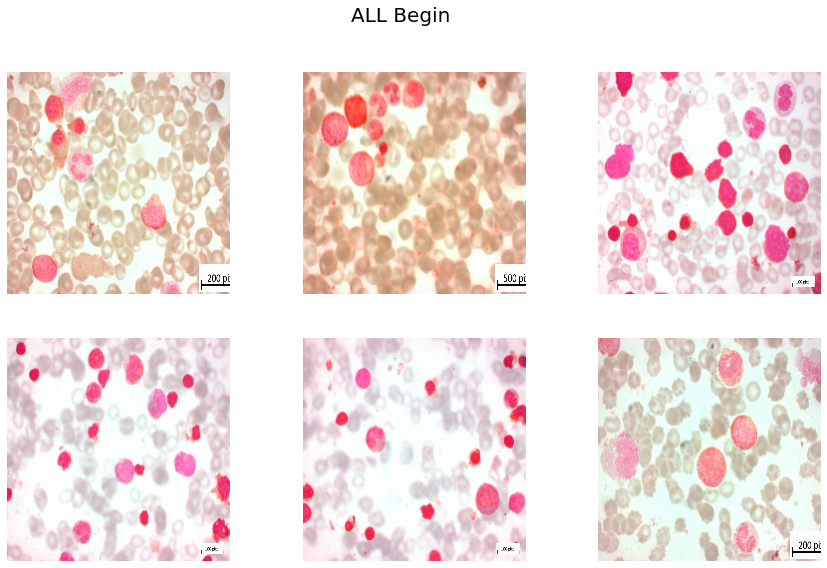

In [ ]:
sample_images = random.sample(Begin,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('Data10/ALL Benign/'+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('ALL Begin',fontsize=20)
plt.show()

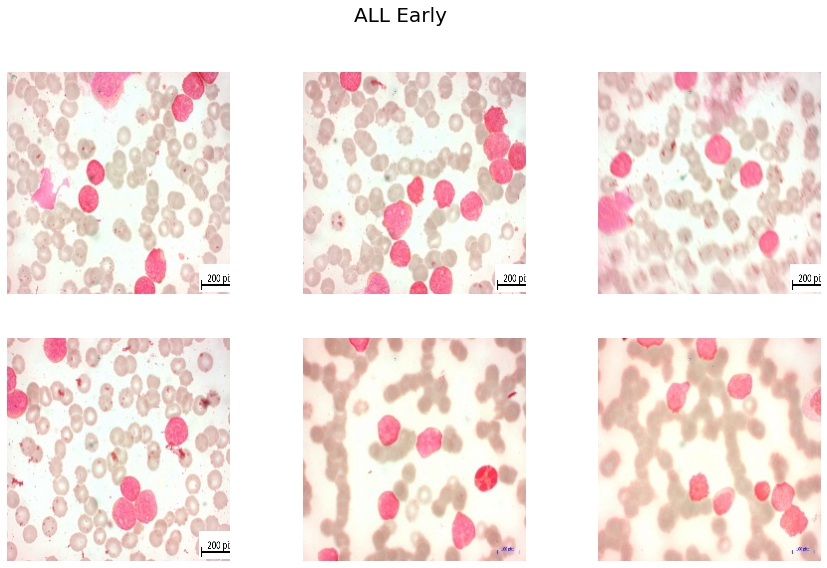

In [ ]:
sample_images = random.sample(Early,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('Data10/ALL Early/'+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('ALL Early',fontsize=20)
plt.show()

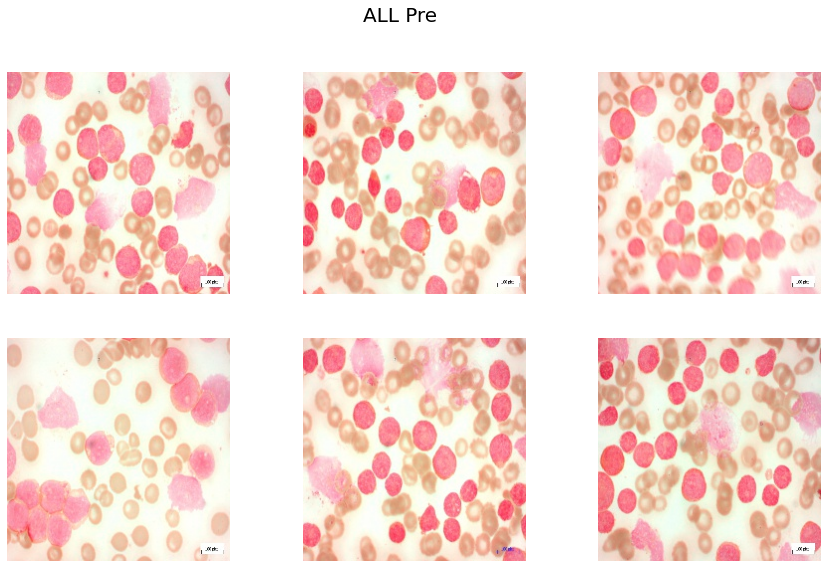

In [ ]:
sample_images = random.sample(Pre,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('Data10/ALL Pre/'+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('ALL Pre',fontsize=20)
plt.show()

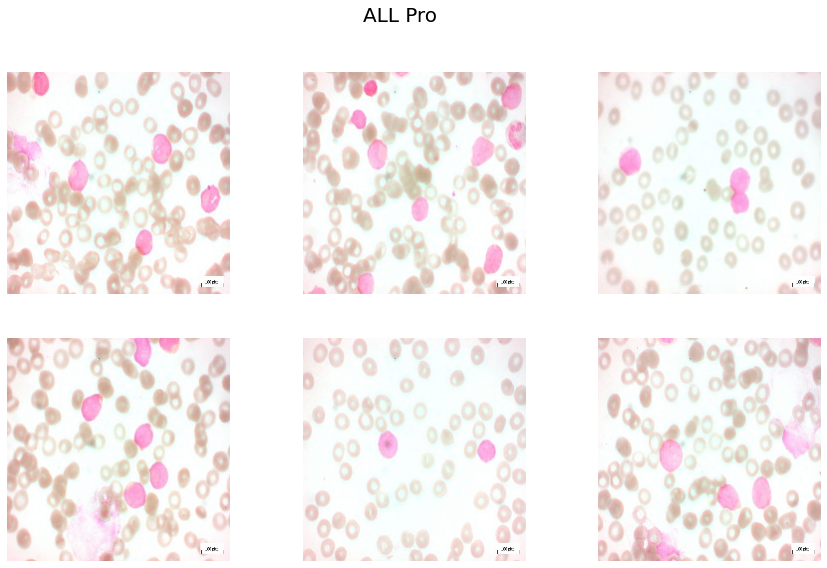

In [ ]:
sample_images = random.sample(Pro,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('Data10/ALL Pro/'+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('ALL Pro',fontsize=20)
plt.show()

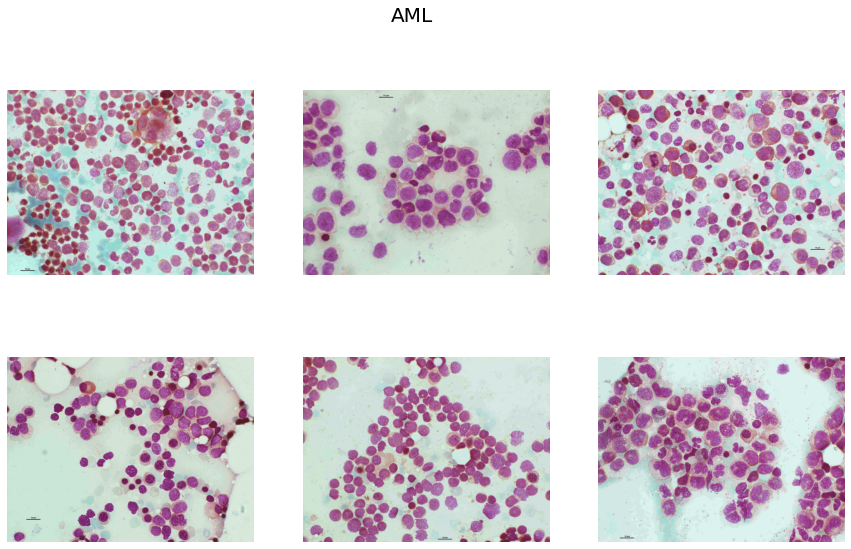

In [ ]:
sample_images = random.sample(AML,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('Data10/AML/'+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('AML',fontsize=20)
plt.show()

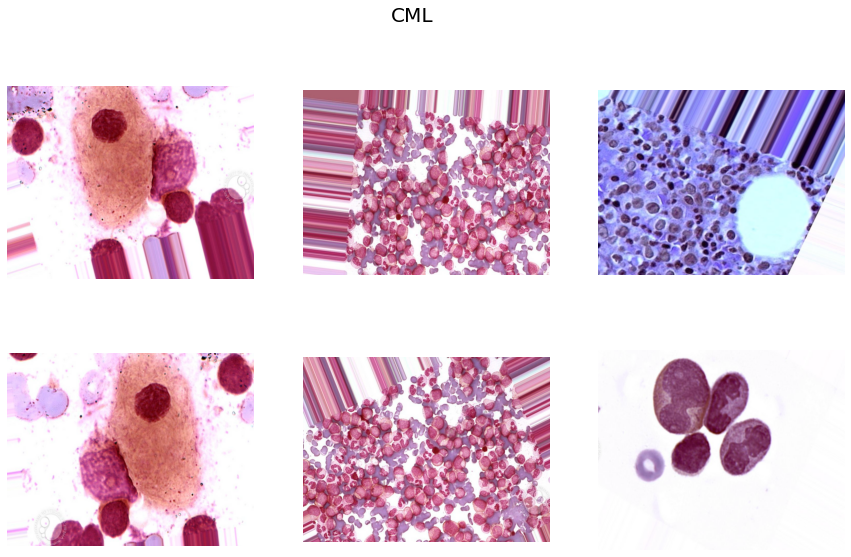

In [ ]:
sample_images = random.sample(CML,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('Data10/CML/'+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('CML',fontsize=20)
plt.show()

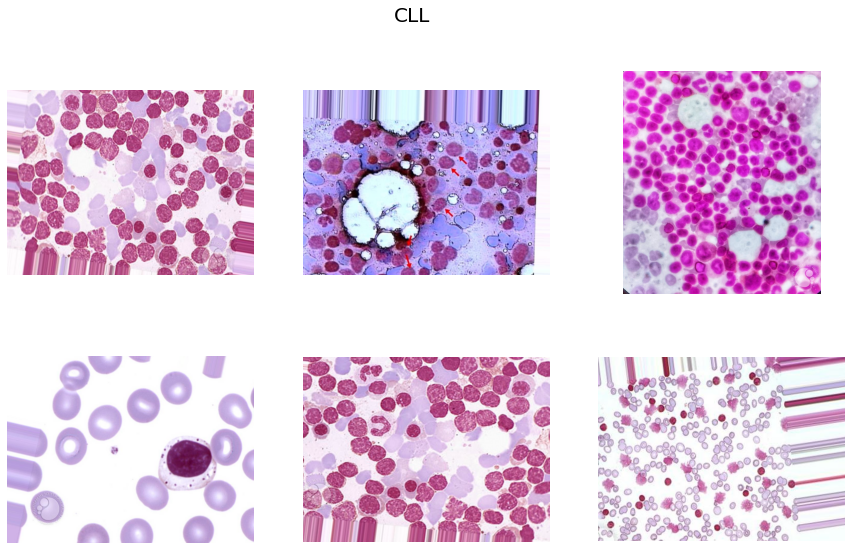

In [ ]:
sample_images = random.sample(CLL,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('Data10/CLL/'+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('CLL',fontsize=20)
plt.show()

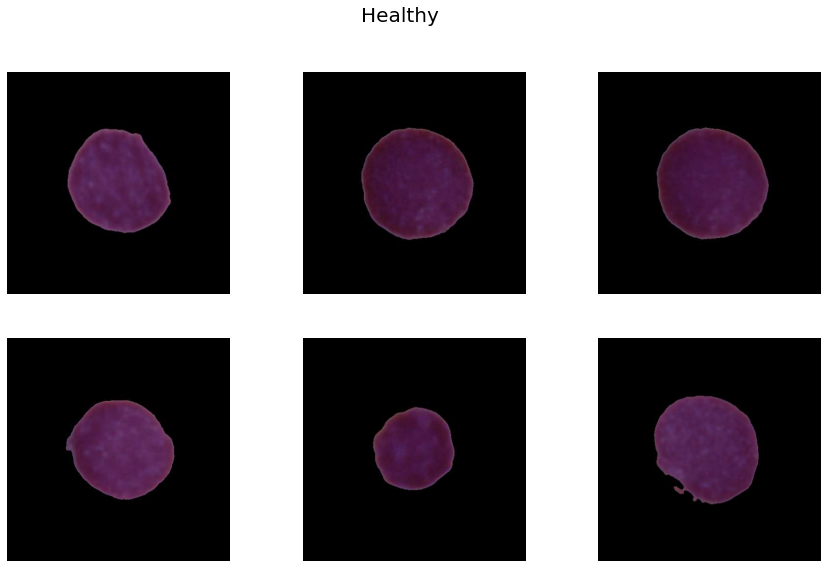

In [ ]:
sample_images = random.sample(Healthy,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('Data10/Healthy/'+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Healthy',fontsize=20)
plt.show()

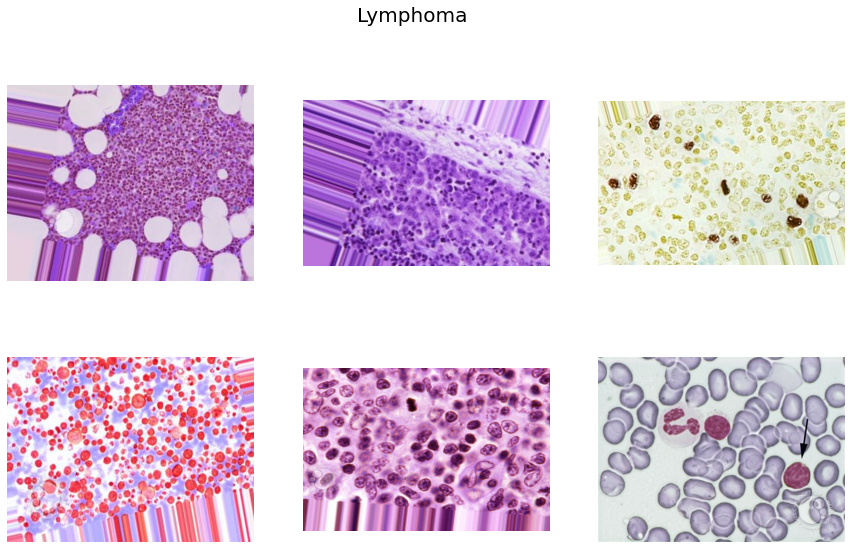

In [ ]:
sample_images = random.sample(Lymphoma,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('Data10/Lymphoma/'+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Lymphoma',fontsize=20)
plt.show()

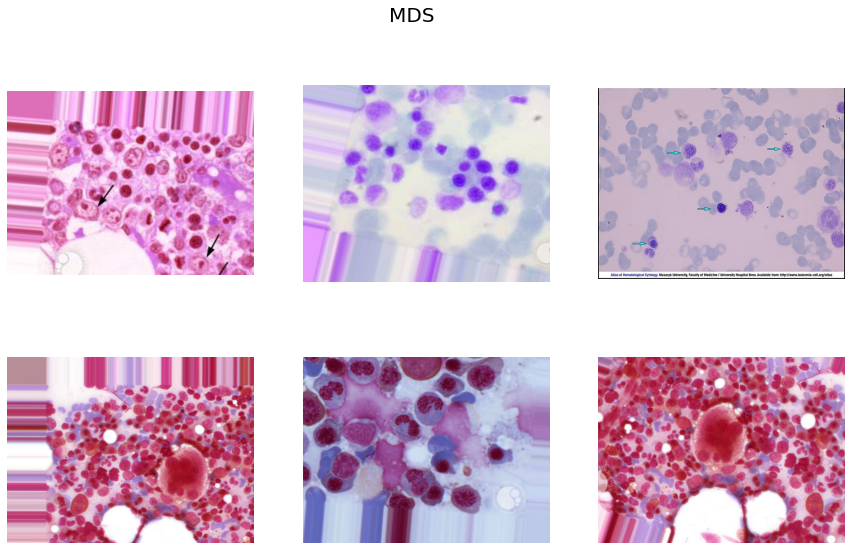

In [ ]:
sample_images = random.sample(MDS,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('Data10/MDS/'+sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('MDS',fontsize=20)
plt.show()

In [ ]:
## Enhancing the CXR Images using White balance and CLAHE

def wb(channel, perc = 0.05):
    mi, ma = (np.percentile(channel, perc), np.percentile(channel,100.0-perc))
    channel = np.uint8(np.clip((channel-mi)*255.0/(ma-mi), 0, 255))
    return channel

In [ ]:
data=[]
labels=[]
Benign=os.listdir("Data10/ALL Benign/")
for a in Benign:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread("Data10/ALL Benign/"+a)
	#imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	#img_clahe1 = clahe.apply(gray_image)
	#img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(0)

In [ ]:
Early=os.listdir("Data10/ALL Early/")
for b in Early:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread("Data10/ALL Early/"+b)
	#imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	#img_clahe1 = clahe.apply(gray_image)
	#img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(image, (224, 224))
	# update the data and labels lists, respectively
	data.append(image)
	labels.append(1)

In [ ]:
Pre=os.listdir("Data10/ALL Pre/")
for c in Pre:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread("Data10/ALL Pre/"+c)
	#imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	#img_clahe1 = clahe.apply(gray_image)
	#img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(2)

In [ ]:
Pro=os.listdir("Data10/ALL Pro/")
for c in Pro:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread("Data10/ALL Pro/"+c)
	#imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	#img_clahe1 = clahe.apply(gray_image)
	#img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(3)

In [ ]:
Pro=os.listdir("Data10/CML/")
for c in Pro:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread("Data10/CML/"+c)
	#imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	#img_clahe1 = clahe.apply(gray_image)
	#img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(4)

In [ ]:
Pro=os.listdir("Data10/CLL/")
for c in Pro:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread("Data10/CLL/"+c)
	#imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	#img_clahe1 = clahe.apply(gray_image)
	#img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(5)

In [ ]:
Pro=os.listdir("Data10/AML/")
for c in Pro:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread("Data10/AML/"+c)
	#imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	#img_clahe1 = clahe.apply(gray_image)
	#img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(6)

In [ ]:
Pro=os.listdir("Data10/Healthy/")
for c in Pro:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread("Data10/Healthy/"+c)
	#imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	#img_clahe1 = clahe.apply(gray_image)
	#img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(7)

In [ ]:
Pro=os.listdir("Data10/Lymphoma/")
for c in Pro:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread("Data10/Lymphoma/"+c)
	#imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	#img_clahe1 = clahe.apply(gray_image)
	#img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(8)

In [ ]:
Pro=os.listdir("Data10/MDS/")
for c in Pro:
	# extract the class label from the filename
	

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread("Data10/MDS/"+c)
	#imWB  = np.dstack([wb(channel, 0.05) for channel in cv2.split(image)] )
	#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
	#img_clahe1 = clahe.apply(gray_image)
	#img = cv2.cvtColor(img_clahe1, cv2.COLOR_GRAY2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(9)

In [ ]:
# data normalization by dividing image pixels by 255
data = np.array(data) / 255.0
labels = np.array(labels)

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,stratify=labels,test_size=0.2,  random_state=1)

In [ ]:
(trainX, valX, trainY, valY)  = train_test_split(trainX,trainY,test_size=0.25,  random_state=1)

In [ ]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
print(valX.shape)
print(valY.shape)

(4627, 224, 224, 3)
(4627,)
(1543, 224, 224, 3)
(1543,)
(1543, 224, 224, 3)
(1543,)


In [ ]:
trainAug  = ImageDataGenerator(rotation_range=15, fill_mode="nearest")

In [ ]:
##DONT RUN
import tensorflow as tf
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (5,5), input_shape=(224,224,3), strides=(2,2), padding="valid", activation = "relu"))
model.add(Conv2D(32, (1,1), strides=(1,1), padding="same", activation = "relu"))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid")) # Max Pooling 1

# 2nd Convolutional Layer
model.add(Conv2D(128, (1,1), strides=(1,1), padding="same", activation = "relu"))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid")) # Max Pooling 1

# 3rd Convolutional Layer
model.add(Conv2D(128, (3,3), strides=(1,1), padding="same", activation = "relu"))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid")) # Max Pooling 2
model.add(Dropout(0.5))




model.add(GlobalAveragePooling2D())
# 1st Fully Connected Layer
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5)) #DropOut
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5)) #DropOut
# 2nd Fully Connected Layer
model.add(Dense(10, activation = "softmax"))

EPOCHS = 50
BS = 8

earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1, factor=0.2, min_lr=0.0009)

mcp_weight = ModelCheckpoint('WhiteBloodCellModel.hdf5', save_best_only=True, monitor='val_loss', mode='min')

callbacks = [earlystop, learning_rate_reduction, mcp_weight]
metrics = ['accuracy',
                tf.keras.metrics.AUC(),
                tf.keras.metrics.Precision(), 
                tf.keras.metrics.Recall()]


model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 110, 110, 32)      2432      
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 110, 110, 32)      1056      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 54, 54, 128)       4224      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 26, 26, 128)       147584    
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 12, 12, 128)     

In [ ]:
###DONT RUN
history=model.fit(trainX, trainY, epochs=100, validation_data=(testX, testY), batch_size=EPOCHS, callbacks=callbacks)

Train on 4627 samples, validate on 1543 samples
Epoch 1/100
4627/4627 [==============================] - 20s 4ms/sample - loss: 1.6820 - acc: 0.3668 - val_loss: 1.3399 - val_acc: 0.4206
Epoch 2/100
4627/4627 [==============================] - 17s 4ms/sample - loss: 1.2274 - acc: 0.4798 - val_loss: 1.1863 - val_acc: 0.4783
Epoch 3/100
4627/4627 [==============================] - 17s 4ms/sample - loss: 1.0934 - acc: 0.5455 - val_loss: 1.0338 - val_acc: 0.5301
Epoch 4/100
4627/4627 [==============================] - 17s 4ms/sample - loss: 0.8754 - acc: 0.6622 - val_loss: 0.6902 - val_acc: 0.7401
Epoch 5/100
4627/4627 [==============================] - 17s 4ms/sample - loss: 0.7520 - acc: 0.7136 - val_loss: 0.5645 - val_acc: 0.8069
Epoch 6/100
4627/4627 [==============================] - 17s 4ms/sample - loss: 0.5912 - acc: 0.7834 - val_loss: 0.4292 - val_acc: 0.8548
Epoch 7/100
4627/4627 [==============================] - 17s 4ms/sample - loss: 0.5772 - acc: 0.7912 - val_loss: 0.4204 - va

dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])


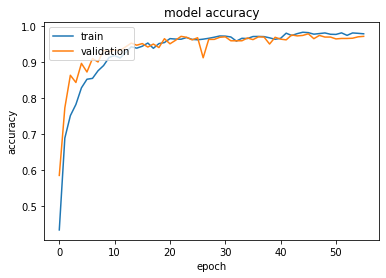

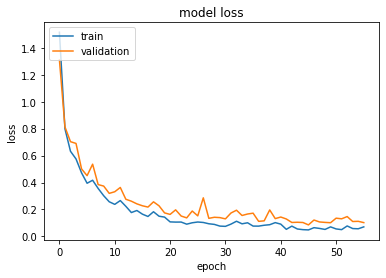

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
##DONT RUN
## Loading best model based on its weights

from numpy import loadtxt
from tensorflow.keras.models import load_model
#model = load_model('RetinalNewModel.hdf5')
score = model.evaluate(valX, valY,verbose=1)

print(score)

1543/1543 [==============================] - 4s 3ms/sample - loss: 0.0860 - acc: 0.9806
[0.08602611501462762, 0.9805574]


1543/1543 [==============================] - 4s 2ms/sample


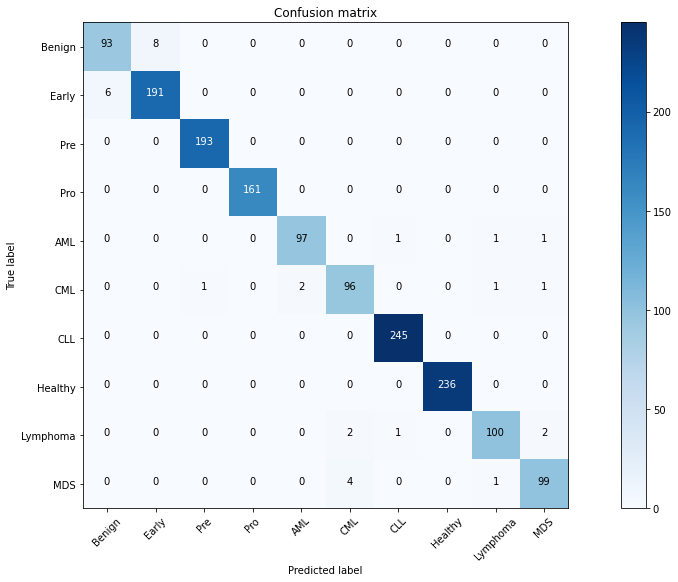

In [ ]:
import itertools
pred_Y = model.predict(testX, batch_size = 8, verbose = True)

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names =['Benign','Early','Pre', 'Pro', 'AML', 'CML', 'CLL', 'Healthy', 'Lymphoma', 'MDS']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(testX, batch_size=BS)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred_Y,axis = 1) 
# Convert validation observations to one hot vectors
# compute the confusion matrix
confusion_mtx = confusion_matrix(testY, Y_pred_classes)

 

# plot the confusion matrix
plt.figure(figsize=(15,8))
plot_confusion_matrix(confusion_mtx, classes = range(3)) 

In [ ]:
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)


# show a nicely formatted classification report
print(classification_report(testY, predIdxs,target_names=['Benign','Early','Pre', 'Pro', 'AML', 'CML', 'CLL', 'Healthy', 'Lymphoma', 'MDS']))

              precision    recall  f1-score   support

      Benign       0.94      0.92      0.93       101
       Early       0.96      0.97      0.96       197
         Pre       0.99      1.00      1.00       193
         Pro       1.00      1.00      1.00       161
         AML       0.98      0.97      0.97       100
         CML       0.94      0.95      0.95       101
         CLL       0.99      1.00      1.00       245
     Healthy       1.00      1.00      1.00       236
    Lymphoma       0.97      0.95      0.96       105
         MDS       0.96      0.95      0.96       104

    accuracy                           0.98      1543
   macro avg       0.97      0.97      0.97      1543
weighted avg       0.98      0.98      0.98      1543



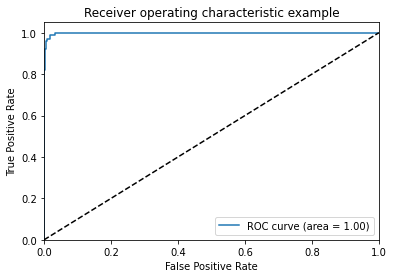

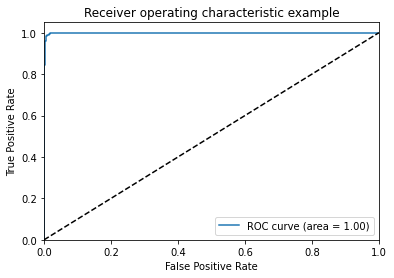

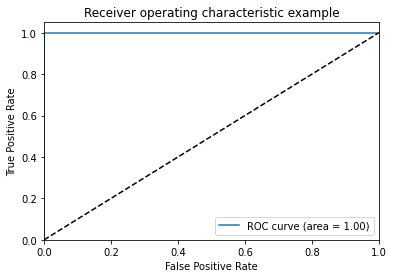

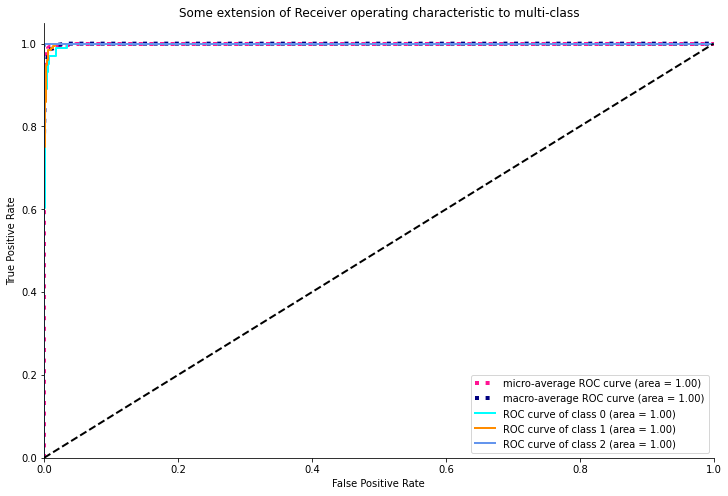

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_test = pd.get_dummies(testY)
y_test = np.array(y_test)

n_classes = 3


# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred_Y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred_Y.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig = plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
sns.despine()
plt.show()

In [ ]:
def specificity(y_true, y_pred):
    """
    param:
    y_pred - Predicted labels
    y_true - True labels 
    Returns:
    Specificity score
    """
    neg_y_true = 1 - y_true
    neg_y_pred = 1 - y_pred
    fp = K.sum(neg_y_true * y_pred)
    tn = K.sum(neg_y_true * neg_y_pred)
    specificity = tn / (tn + fp + K.epsilon())
    return specificity

In [ ]:
print(specificity(y_test, Y_pred))

Tensor("truediv:0", shape=(), dtype=float32)


In [ ]:
# getting predictions on val set.
pred=model.predict(testX, batch_size=BS)
Y_pred_classes=np.argmax(pred,axis=1)

Y_true = np.argmax(testY,axis = 0) 

# Mapping Classes
classes = {0 : 'Begining',
            1 : 'Early',
            2 : 'Pre',
            3 : 'Pro',
            4 : 'AML',
            5 : 'CML',
            6:  'CLL',
            7 : 'Healthy',
            8 : 'Lymphoa',
            9 : 'MDS'}

In [ ]:
incorrect = []
for i in range(len(testY)):
    if(not Y_pred_classes[i] == testY[i]):
        incorrect.append(i)
    if(len(incorrect) == 252):
        break

correct = []
for i in range(len(testY)):
    if(Y_pred_classes[i] == testY[i]):
        correct.append(i)
    if(len(correct) == 300):
        break

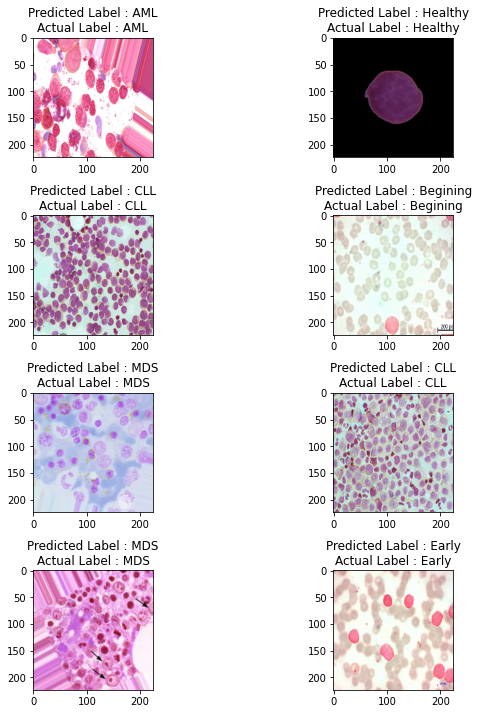

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(12,10))
fig.set_size_inches(10,10)
ax[0,0].imshow(testX[correct[0]], cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[0]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[0]]]))

ax[0,1].imshow(testX[correct[1]], cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[1]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[1]]]))
ax[1,0].imshow(testX[correct[2]], cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[2]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[2]]]))
ax[1,1].imshow(testX[correct[3]], cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[3]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[3]]]))
ax[2,0].imshow(testX[correct[4]], cmap='gray')
ax[2,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[4]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[4]]]))
ax[2,1].imshow(testX[correct[5]], cmap='gray')
ax[2,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[5]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[5]]]))
ax[3,0].imshow(testX[correct[6]], cmap='gray')
ax[3,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[6]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[6]]]))
ax[3,1].imshow(testX[correct[7]], cmap='gray')
ax[3,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[7]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[correct[7]]]))
fig.tight_layout(pad=1.0)
plt.show()

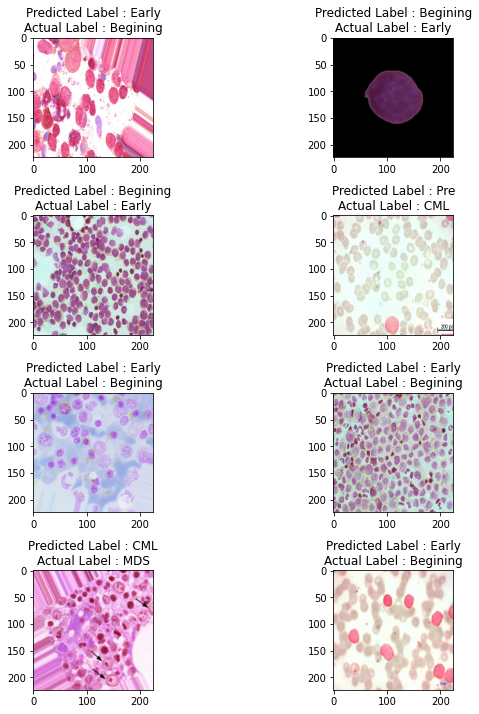

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(12,10))
fig.set_size_inches(10,10)
ax[0,0].imshow(testX[correct[0]], cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[incorrect[0]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[incorrect[0]]]))

ax[0,1].imshow(testX[correct[1]], cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[incorrect[1]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[incorrect[1]]]))
ax[1,0].imshow(testX[correct[2]], cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[incorrect[2]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[incorrect[2]]]))
ax[1,1].imshow(testX[correct[3]], cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[incorrect[3]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[incorrect[3]]]))
ax[2,0].imshow(testX[correct[4]], cmap='gray')
ax[2,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[incorrect[4]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[incorrect[4]]]))
ax[2,1].imshow(testX[correct[5]], cmap='gray')
ax[2,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[incorrect[5]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[incorrect[5]]]))
ax[3,0].imshow(testX[correct[6]], cmap='gray')
ax[3,0].set_title("Predicted Label : " + str(classes[Y_pred_classes[incorrect[6]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[incorrect[6]]]))
ax[3,1].imshow(testX[correct[7]], cmap='gray')
ax[3,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[incorrect[7]]]) + "\n"+"Actual Label : " + 
                 str(classes[testY[incorrect[7]]]))
fig.tight_layout(pad=1.0)
plt.show()

In [ ]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
from skimage.color import label2rgb

  0%|          | 0/100 [00:00<?, ?it/s]

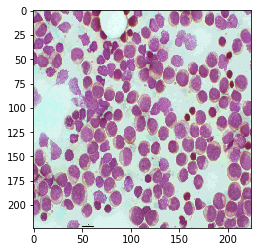

Text(0.5, 1.0, 'Predicted Label : CLL Actual Label : CLL')


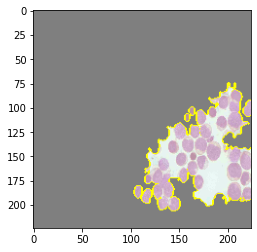

In [ ]:
n=2
explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(testX[correct[n]], model.predict, top_labels=5, hide_color=0, num_samples=100)

pic=testX[correct[n]]
plt.imshow(pic, interpolation='nearest')
plt.show()
print(ax[3,1].set_title("Predicted Label : " + str(classes[Y_pred_classes[correct[n]]]) + " "+"Actual Label : " + 
                 str(classes[testY[correct[n]]])))


temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Features 5 positive_only=True


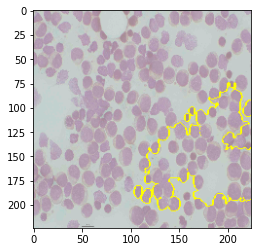

In [ ]:
print('Features 5 positive_only=True')
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 3 + 0.5, mask))

Features 10 positive_only=False


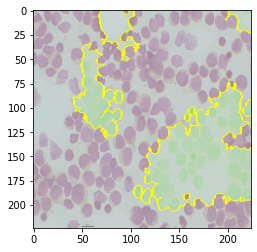

In [ ]:
print('Features 10 positive_only=False')
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 3 + 0.5, mask))

Text(0.5, 1.0, 'Positive/Negative Regions for 6')

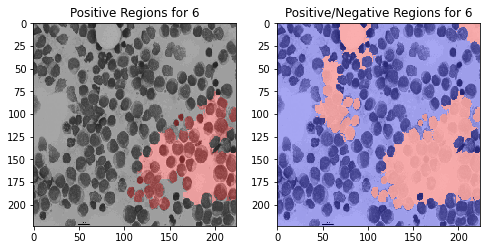

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(explanation.top_labels[0]))
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
ax2.imshow(label2rgb(3-mask,temp, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive/Negative Regions for {}'.format(explanation.top_labels[0]))

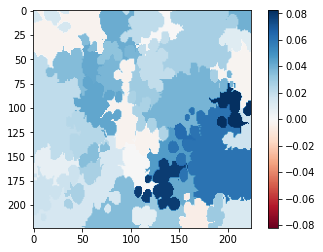

In [ ]:
#Select the same class explained on the figures above.
#Alternatively, we can also plot explanation weights onto a heatmap visualization. The colorbar shows the values of the weights.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

In [ ]:
from tensorflow.keras import optimizers
optimizers.RMSprop()

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.utils.callbacks import Print

# Define modifier to replace a softmax function of the last layer to a linear function.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear

# Create Activation Maximization object
activation_maximization = ActivationMaximization(model, model_modifier)

# Define loss function. 20 is the imagenet index corresponding to ouzel.
loss = lambda x: K.mean(x[:, 1])

# Generate max activation with debug printing
activation = activation_maximization(loss, callbacks=[Print(interval=100)])
image = activation[0].astype(np.uint8)

f, ax = plt.subplots(figsize=(10, 5), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)
plt.show()

D:\anconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.


AttributeError: module 'tensorflow' has no attribute 'optimizers'

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import load_img
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize

# Load images
img1 = load_img('F:\ALL\Data10\ALL Benign\0_ALLBenign.jpg', target_size=(224, 224))
img2 = load_img('F:\ALL\Data10\ALL Benign\0_ALLBenign.jpg', target_size=(224, 224))

images = np.asarray([np.array(img1), np.array(img2)])

# Prepare datasets
X = preprocess_input(images)

# Render
subprot_args = {
    'nrows': 1,
    'ncols': 2,
    'figsize': (18, 5),
    'subplot_kw': {'xticks': [], 'yticks': []}
}
f, ax = plt.subplots(**subprot_args)
for i in range(len(images)):
    ax[i].imshow(images[i])
plt.tight_layout()
plt.show()

# Create Gradcam object
gradcam = Gradcam(model, model_modifier, clone=False)

# Generate heatmap with GradCAM
cam = gradcam(loss, X)
cam = normalize(cam)

f, ax = plt.subplots(**subprot_args)
for i in range(len(cam)):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.7)
plt.tight_layout()
plt.show()

ValueError: embedded null character

In [ ]:
img3 = load_img('../input/xai-whitebloodcell/Data10/ALL Pre/160_ALLPre.jpg', target_size=(224, 224))
img4 = load_img('../input/xai-whitebloodcell/Data10/ALL Pro/170_ALLPro.jpg', target_size=(224, 224))

images = np.asarray([np.array(img3), np.array(img4)])

# Prepare datasets
X = preprocess_input(images)

subprot_args = {
    'nrows': 1,
    'ncols': 2,
    'figsize': (18, 5),
    'subplot_kw': {'xticks': [], 'yticks': []}
}
f, ax = plt.subplots(**subprot_args)
for i in range(len(images)):
    ax[i].imshow(images[i])
plt.tight_layout()
plt.show()

# Create Gradcam object
gradcam = Gradcam(model, model_modifier, clone=False)

# Generate heatmap with GradCAM
cam = gradcam(loss, X)
cam = normalize(cam)

f, ax = plt.subplots(**subprot_args)
for i in range(len(cam)):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
img4 = load_img('../input/xai-whitebloodcell/Data10/AML/100_AML.jpg', target_size=(224, 224))
img5 = load_img('../input/xai-whitebloodcell/Data10/CLL/23_CLL.jpg', target_size=(224, 224))

images = np.asarray([np.array(img4), np.array(img5)])

# Prepare datasets
X = preprocess_input(images)

subprot_args = {
    'nrows': 1,
    'ncols': 2,
    'figsize': (18, 5),
    'subplot_kw': {'xticks': [], 'yticks': []}
}
f, ax = plt.subplots(**subprot_args)
for i in range(len(images)):
    ax[i].imshow(images[i])
plt.tight_layout()
plt.show()

# Create Gradcam object
gradcam = Gradcam(model, model_modifier, clone=False)

# Generate heatmap with GradCAM
cam = gradcam(loss, X)
cam = normalize(cam)

f, ax = plt.subplots(**subprot_args)
for i in range(len(cam)):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
img6 = load_img('../input/xai-whitebloodcell/Data10/CML/17_CML.jpg', target_size=(224, 224))
img7 = load_img('../input/xai-whitebloodcell/Data10/Healthy/8_Healthy.jpg', target_size=(224, 224))

images = np.asarray([np.array(img6), np.array(img7)])

# Prepare datasets
X = preprocess_input(images)

subprot_args = {
    'nrows': 1,
    'ncols': 2,
    'figsize': (18, 5),
    'subplot_kw': {'xticks': [], 'yticks': []}
}
f, ax = plt.subplots(**subprot_args)
for i in range(len(images)):
    ax[i].imshow(images[i])
plt.tight_layout()
plt.show()

# Create Gradcam object
gradcam = Gradcam(model, model_modifier, clone=False)

# Generate heatmap with GradCAM
cam = gradcam(loss, X)
cam = normalize(cam)

f, ax = plt.subplots(**subprot_args)
for i in range(len(cam)):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
img9 = load_img('../input/xai-whitebloodcell/Data10/Lymphoma/0_Lymphoma.jpg', target_size=(224, 224))
img10 = load_img('../input/xai-whitebloodcell/Data10/MDS/6_MDS.jpg', target_size=(224, 224))

images = np.asarray([np.array(img9), np.array(img10)])

# Prepare datasets
X = preprocess_input(images)

subprot_args = {
    'nrows': 1,
    'ncols': 2,
    'figsize': (18, 5),
    'subplot_kw': {'xticks': [], 'yticks': []}
}
f, ax = plt.subplots(**subprot_args)
for i in range(len(images)):
    ax[i].imshow(images[i])
plt.tight_layout()
plt.show()

# Create Gradcam object
gradcam = Gradcam(model, model_modifier, clone=False)

# Generate heatmap with GradCAM
cam = gradcam(loss, X)
cam = normalize(cam)

f, ax = plt.subplots(**subprot_args)
for i in range(len(cam)):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
ins = np.asarray([np.array(testX[correct[1]]), np.array(testX[correct[2]]), np.array(testX[correct[3]]), np.array(testX[correct[4]]), 
                  np.array(testX[correct[5]]), np.array(testX[correct[6]]), np.array(testX[correct[7]]), np.array(testX[correct[8]]), 
                  np.array(testX[correct[9]]), np.array(testX[correct[10]])])
S = preprocess_input(images)

# Render
subprot_args = {
    'nrows': 1,
    'ncols': 10,
    'figsize': (28, 4),
    'subplot_kw': {'xticks': [], 'yticks': []}
}
f, ax = plt.subplots(**subprot_args)
for i in range(len(ins)):
    ax[i].imshow(ins[i])
plt.tight_layout()
plt.show()

from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize

# Create Gradcam object
gradcam = Gradcam(model, model_modifier, clone=False)

# Generate heatmap with GradCAM
cam = gradcam(loss, S)
cam = normalize(cam)

f, ax = plt.subplots(**subprot_args)
for i in range(len(cam)):
    heatmap = np.uint8(cm.jet(cam[i])[..., :10] * 255)
    ax[i].imshow(ins[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
plt.tight_layout()
plt.show()